## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [31]:
import pandas as pd
import matplotlib.pyplot as plt


## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [3]:
df = pd.read_csv("QueryResults.csv")

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [4]:
print(df.head(5))
print(df.tail(5))

                     m     TagName  Unnamed: 2
0  2008-07-01 00:00:00          c#           3
1  2008-08-01 00:00:00    assembly           8
2  2008-08-01 00:00:00  javascript         162
3  2008-08-01 00:00:00           c          85
4  2008-08-01 00:00:00      python         124
                        m TagName  Unnamed: 2
1986  2020-07-01 00:00:00       r        5694
1987  2020-07-01 00:00:00      go         743
1988  2020-07-01 00:00:00    ruby         775
1989  2020-07-01 00:00:00    perl         182
1990  2020-07-01 00:00:00   swift        3607


**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [14]:
df.shape


(1991, 3)

**Challenge**: Count the number of entries in each column of the dataframe

In [9]:
# Ingore na in the count.
df.count()

m             1991
TagName       1991
Unnamed: 2    1991
dtype: int64

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [17]:
sum_by_language = df.groupby('TagName')['Unnamed: 2'].sum().sort_values(ascending=False)
sum_by_language

TagName
javascript    2056510
java          1696403
python        1496210
c#            1423530
php           1361988
c++            684210
r              356799
c              336042
swift          273055
ruby           214582
perl            65286
go              47499
delphi          46212
assembly        34852
Name: Unnamed: 2, dtype: int64

Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [11]:
df['m'] = pd.to_datetime(df['m'])

## Data Manipulation



**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [19]:
df.shape

(1991, 3)

In [20]:
df.columns

Index(['m', 'TagName', 'Unnamed: 2'], dtype='object')

In [21]:
df.head(5)

,m,TagName,Unnamed: 2
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,javascript,162
3,2008-08-01,c,85
4,2008-08-01,python,124


**Challenge**: Count the number of entries per programming language. Why might the number of entries be different? 

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

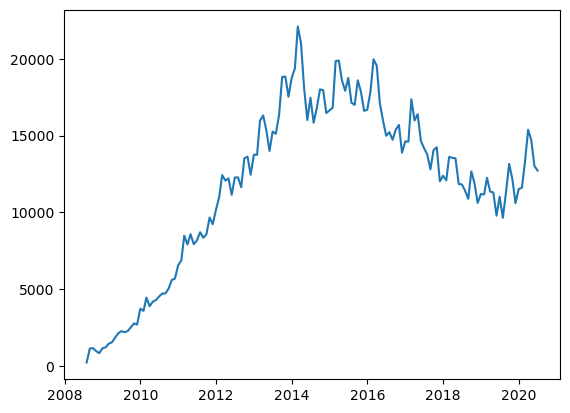

In [32]:
condition = df['TagName'] == 'java'
java_data = df.loc[condition, :]
plt.plot(java_data['m'], java_data['Unnamed: 2'])

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

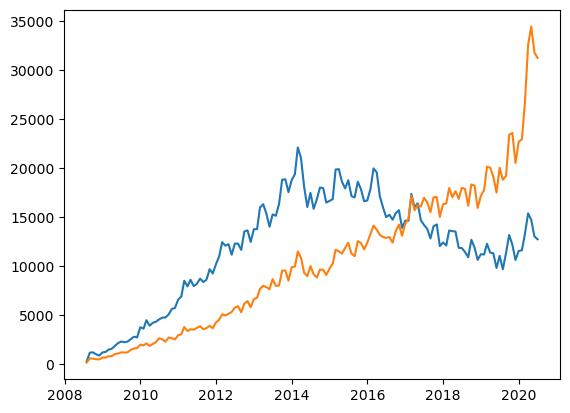

In [37]:
condition = df['TagName'] == 'python'
python_data = df.loc[condition, :]

plt.plot(java_data['m'], java_data['Unnamed: 2']);
plt.plot(python_data['m'], python_data['Unnamed: 2']);

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 